<h1 style="text-align:center;">Sentiment Analysis: Valorant Chats</h1>

This sentiment analysis goals

### Import data

In [1]:
import pandas as pd
import scipy 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
uncleaned_dataset = pd.read_csv("./CSIS3112- Natural Language Processing Survey.csv")
uncleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                      --------------  ----- 
 0   Timestamp                                                                                                                                                   753 non-null    object
 1   Contact Number                                                                                                                                              715 non-null    object
 2   IGN #tagline                                                                                                                                              

----------------------------

## Cleaning the Datasets

The raw dataset have a multivalued data or columns like column 7, 8, and 12 which contains different chats in words, phrase and sentences, therefore this will have to expand. In order to make it more less redundan for the other columns value the dataset will be be divided or create 2 dataframe which separates the multivalue columns like column 8,7,12 and combined those then label them for the training of set; and player experience for the statistics.

The first process used a power query to separate those columns with there keys which are ign of the players. Using the Microsoft excel to label those rows of data with sentiments manually. Also, includes the removing of the data that's not a chat, especially explnation statements.



<div style="display:flex;justify-content:center;">
<table>
  <tr>
    <th>Chat Message</th>
  </tr>
  <tr>
    <th>columns</th>
    <th>description</th>
  </tr>
  <tr>
    <td>player</td>
    <td>In-game tags or the individual participants</td>
  </tr>
  <tr>
    <td>message</td>
    <td>The message they can see at chat</td>
  </tr>
  <tr>
    <td>label</td>
    <td>Sentiment of the word</td>
  </tr>
  <tr>
    <td>type</td>
    <td>Type of medium where they receive the message</td>
  </tr>
</table>
<br>
  <table>
  <tr>
    <th>Player Experience</th>
  </tr>
  <tr>
    <th>columns</th>
    <th>alias</th>

  </tr>
  <tr>
    <td>Timestamp</td>                                                                   
    <td>Timestamp</td>  
  </tr>
  <tr>
    <td>Contact Number</td>                                                                   
    <td>contact_number</td>  
  </tr>
  <tr>
  <td>
   IGN #tagline                                                                                                                                                
  </td>
  <td>
   player                                                                                                                                               
  </td>
  </tr>
  <tr>
    <td>
      Do you play valorant regularly?                                                                                                                             
    </td>
    <td>is_regular_player</td>
  </tr>
  <tr>
  <td>         
  How many Valorant matches/games do you play  in a week?    
    </td>
    <td>                                                               
    often_a_week
    </td>
    
  </tr>
  <tr>
    <td>
  Which server do you mostly play in?                                                                                                            
    </td>
    <td>
    most_played_server                                                                                         
    </td>
  </tr>
  <tr>
    <td>
  Do you think that Valorant chats are becoming more toxic than before?                                                                                                                           
    </td>
    <td>
        is_chat_toxic_than_before                                                                                 
    </td>
  </tr>
  <tr>
    <td>
  When do you mostly experience toxicity in game?                                                                                                                        
    </td>
    <td>
        toxic_part_of_game                                                                                 
    </td>
  </tr>
  <tr>
    <td>
  How did you feel after receiving this chats?                                                                                                                
    </td>
    <td>
        feelings_of_receiving_negative                                                                               
    </td>
  </tr>
    <tr>
    <td>                                                                                                             
  Which server do you think is the most toxic server in Valorant SouthEast Asia?     
    </td>
    <td>
        most_toxic_server                                                                               
    </td>
  </tr>
 
  <tr>
    <td>                                                                                                              
  How did you feel after receiving this chats?
    </td>
    <td>
        feelings_of_receiving_positive                                                                            
    </td>
  </tr>
   <tr>
    <td>                                                                                                              
  Do you think that the Valorant chat is healthier or more toxic compared to other games like DOTA, League of Legends etc...?        
    </td>
    <td>
        is_valorant_healthier_other_games                                                                       
    </td>
  </tr>
</table>

</div>

After labelling and combining the columns contains words using excel, we able to get a processed dataset.

In [3]:
labeled_dataset = pd.read_csv("./labeled_dataset.csv")
labeled_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   player   8107 non-null   object
 1   message  8073 non-null   object
 2   label    7984 non-null   object
 3   type     8117 non-null   object
dtypes: object(4)
memory usage: 253.8+ KB


In [4]:
player_experience_dataset = pd.read_csv("./player_experience.csv")
player_experience_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Timestamp                          753 non-null    object
 1   contact_number                     715 non-null    object
 2   player                             726 non-null    object
 3   is_regular_player                  752 non-null    object
 4   often_a_week                       752 non-null    object
 5   most_played_server                 752 non-null    object
 6   is_chat_toxic_than_before          752 non-null    object
 7   toxic_part_of_game                 752 non-null    object
 8   feelings_of_receiving_positive     748 non-null    object
 9   is_valorant_healthier_other_games  752 non-null    object
 10  most_toxic_server                  752 non-null    object
 11  feelings_of_receiving_negative     747 non-null    object
dtypes: objec

Because the raw datasets were splitted into two,  both datasets must be cleaned that been splitted and preprocessed.

### Removing NA

Removing N/A row in the labelled dataset so we can able to evaluate or train the labelled dataset nicely

The dataset of player_experience don't need to drop n/a as mostly the n/a rows are just the contact number which not really necessary for evaluating the data gathered. Therefore, we just fill it with 0 or null

In [5]:
player_experience_dataset

,Timestamp,contact_number,player,is_regular_player,often_a_week,most_played_server,is_chat_toxic_than_before,toxic_part_of_game,feelings_of_receiving_positive,is_valorant_healthier_other_games,most_toxic_server,feelings_of_receiving_negative
0,2022/12/05 6:35:49 PM GMT+8,9054880838,Crescht #blom,Yes,5-10 games,Hong Kong,Yes,Early-game,Happy,Healthier,Hong Kong,Mad sometimes? other times just normal
1,2022/12/05 6:38:16 PM GMT+8,9215190801,Berith#TWICE,No,1-5 games,Hong Kong,No,Mid-game,Happy,Healthier,Singapore,Anger
2,2022/12/05 6:38:25 PM GMT+8,9216934077,XH Elly#0001,Yes,more than 15 games,Singapore,Yes,Mid-game,Alright,More toxic,Hong Kong,Does not affect me
3,2022/12/05 6:39:10 PM GMT+8,9171204041,Woo wop #2220,No,1-5 games,Singapore,No,Late-game,encouraged to play more,Healthier,Hong Kong,I feel bad for my teammates because i know the...
4,2022/12/05 6:40:18 PM GMT+8,9664631174,14th Element#6250,Yes,10-15 games,Hong Kong,Yes,Mid-game,I feel motivated.,Healthier,Hong Kong,I feel mad or annoyed but sometimes it makes m...
...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022/12/24 2:05:56 PM GMT+8,9274771959,Zero Integral #AVI,Yes,10-15 games,Singapore,Yes,Late-game,Nothing really,More toxic,Hong Kong,Not really taking everything seriously
749,2022/12/24 2:29:53 PM GMT+8,9471871760,Burakdoy #0911,Yes,5-10 games,Hong Kong,No,Early-game,I feel like it wasn't me specially during clut...,Healthier,Hong Kong,I'm used to it but sometimes I get mad. All in...
750,2022/12/24 3:47:23 PM GMT+8,9206588862,LoloSanders #AshMC,Yes,10-15 games,Hong Kong,Yes,Mid-game,Nothing.,Healthier,Hong Kong,Nothing.
751,2022/12/24 4:35:33 PM GMT+8,9675167871,Calmpath #9409,Yes,1-5 games,Singapore,No,Mid-game,I feel like im getting good at this game,Healthier,Singapore,"Nothing, because I know they can't do anything..."


### Preprocessing

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import WordNetLemmatizer

import advertools as adv
# labeled_dataset

For this preprocessing we use nltk and advertools packages to provide stop words for tagalog and english

In [7]:
labeled_dataset['message']=labeled_dataset['message'].apply(lambda x: str(x))

In [8]:
corpus = []
for i in range(0,len(labeled_dataset)):
    # Remove special characters
    tweet = re.sub('[^a-zA-Z#]', ' ', labeled_dataset['message'][i])
    chat = labeled_dataset['message'][i]
    chat = chat.lower()
    chat = chat.split()
    # Remove stop words
    all_stopwords_eng = stopwords.words('english')
    all_stopwords_eng.remove('not')
    all_stopwords_tag = adv.stopwords['tagalog']
    chat = [word for word in chat if not word in set(all_stopwords_eng) and word not in set(all_stopwords_tag)]
    chat = ' '.join(chat)
    corpus.append(chat)

In [9]:
labeled_dataset["cl_message"] = corpus
labeled_dataset.tail(10)

,player,message,label,type,cl_message
8107,LoloSanders #AshMC,wow,positive,voice,wow
8108,LoloSanders #AshMC,nice,positive,voice,nice
8109,Calmpath #9409,We good bro,positive,voice,good bro
8110,Calmpath #9409,GGs guys,positive,voice,ggs guys
8111,Calmpath #9409,nc,positive,voice,nc
8112,Calmpath #9409,nt,positive,voice,nt
8113,DN NEMO#PEKOO,nice shot,positive,voice,nice shot
8114,DN NEMO#PEKOO,basically anything when vibing,positive,voice,basically anything vibing
8115,DN NEMO#PEKOO,sarap mo,positive,voice,sarap mo
8116,DN NEMO#PEKOO,nan,NaN,voice,nan


In [10]:
labeled_dataset=labeled_dataset.dropna()

In [11]:
labeled_dataset.head()

,player,message,label,type,cl_message
0,Crescht #blom,nt,positive,text,nt
1,Crescht #blom,bobo,negative,text,bobo
2,Crescht #blom,quit ka nalang,negative,text,quit nalang
3,Berith#TWICE,bobo,negative,text,bobo
4,Berith#TWICE,goblok,negative,text,goblok


In [12]:
tokenized_chat= labeled_dataset['cl_message'].apply(lambda x: x.split()) # Rows as x
tokenized_chat.head()

0              [nt]
1            [bobo]
2    [quit, nalang]
3            [bobo]
4          [goblok]
Name: cl_message, dtype: object

In [13]:
lem = nltk.WordNetLemmatizer()
tokenized_chat= tokenized_chat.apply(lambda x: [lem.lemmatize(word) for word in x])

In [14]:
labeled_dataset["cl_message"] = tokenized_chat
labeled_dataset

,player,message,label,type,cl_message
0,Crescht #blom,nt,positive,text,[nt]
1,Crescht #blom,bobo,negative,text,[bobo]
2,Crescht #blom,quit ka nalang,negative,text,"[quit, nalang]"
3,Berith#TWICE,bobo,negative,text,[bobo]
4,Berith#TWICE,goblok,negative,text,[goblok]
...,...,...,...,...,...
8111,Calmpath #9409,nc,positive,voice,[nc]
8112,Calmpath #9409,nt,positive,voice,[nt]
8113,DN NEMO#PEKOO,nice shot,positive,voice,"[nice, shot]"
8114,DN NEMO#PEKOO,basically anything when vibing,positive,voice,"[basically, anything, vibing]"


----------------------------------------------

# Visualizations

In this section, the visualization ormutaion of the current data will discuss and show.

In [15]:
def normalization(df, column):
    # Using Z-Score for normalizing the column 
    normal = (df[column] - df[column].mean()) / df[column].std()
    return normal

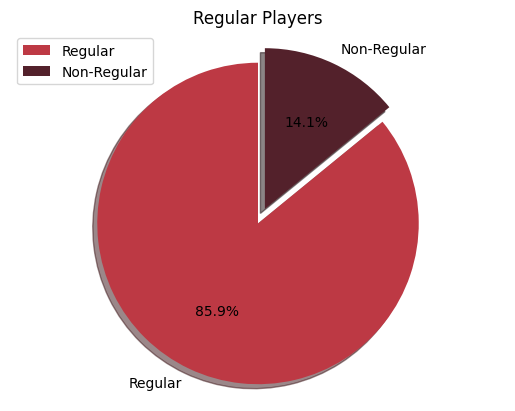

In [16]:
regular_players=player_experience_dataset["is_regular_player"].value_counts()

labels = 'Regular','Non-Regular'
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(regular_players, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["#BD3944","#53212B"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Regular Players")
plt.legend()
plt.show()

Most of the respondents are very often playing Valorant.

In [17]:
servers = player_experience_dataset["most_played_server"].dropna().unique() # Servers in SEA
servers

array(['Hong Kong', 'Singapore', 'Tokyo', 'Mumbai', 'Sydney'],
      dtype=object)

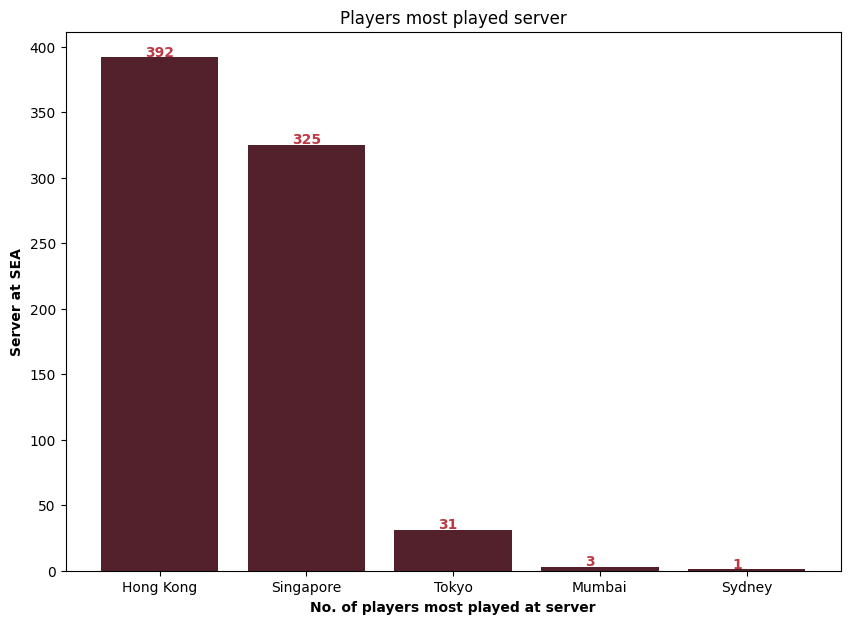

In [18]:
most_played_server=player_experience_dataset["most_played_server"].value_counts()

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(servers, most_played_server, color ='#53212B')
# Labels
for i, v in enumerate(most_played_server):
    ax.text(i-0.1, v+1, str(v), color="#BD3944", fontweight='bold')
plt.ylabel("Server at SEA",fontweight = 'bold')
plt.xlabel("No. of players most played at server",fontweight = 'bold')
plt.title("Players most played server")
plt.show()

This graph shows that the Filipino players of valorant community mostly playing in Hong kong and Singapose servers.

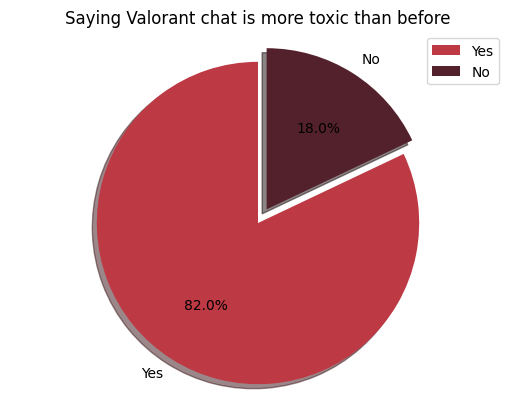

In [19]:
count_players_agree= player_experience_dataset["is_chat_toxic_than_before"].value_counts()
labels = 'Yes','No'
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(count_players_agree, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["#BD3944","#53212B"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Saying Valorant chat is more toxic than before")
plt.legend()
plt.show()

82% out of 753 participants agreed that the Valorant chat is more toxic than before.

In [20]:
part_game_toxic=player_experience_dataset["toxic_part_of_game"].value_counts()

sampling=part_game_toxic.values
part_of_game_toxic = pd.DataFrame({"Number of Player": sampling}, index=part_game_toxic.index)
part_of_game_toxic_total = part_of_game_toxic.sum()
part_of_game_toxic["Percentage"] = part_of_game_toxic["Number of Player"].apply(lambda x: (x/part_of_game_toxic_total)*100)
part_of_game_toxic.loc["Total"] = [part_of_game_toxic["Number of Player"].sum(), part_of_game_toxic["Percentage"].sum()]
part_of_game_toxic

,Number of Player,Percentage
toxic_part_of_game,,
Mid-game,518.0,68.882979
Early-game,147.0,19.547872
Late-game,75.0,9.973404
Agent Select,12.0,1.595745
Total,752.0,100.000000


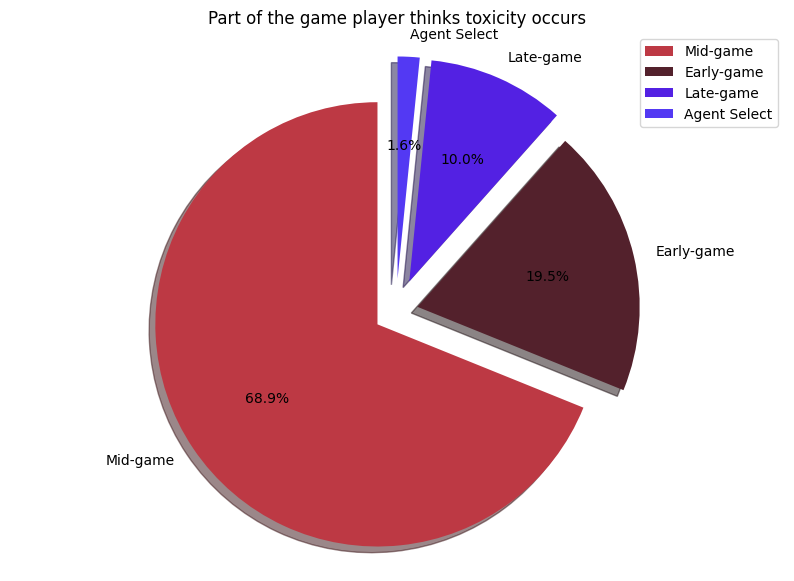

In [21]:
labels_part_game = "Mid-game","Early-game","Late-game","Agent Select"
explode = (0.1, 0.1, 0.15, 0.15)
fig1, ax1 = plt.subplots(figsize=(10,7))

ax1.pie(part_game_toxic, explode=explode, labels=labels_part_game, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["#BD3944","#53212C","#5321E3", "#5339F3"])
        
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Part of the game player thinks toxicity occurs")
plt.legend()
plt.show()

### How Often Players Play a Week

In [24]:
often_a_week = player_experience_dataset["often_a_week"].value_counts().sort_index()
df = pd.DataFrame(often_a_week)
df
# fig, ax = plt.subplots(figsize=(10,5))
# plt.bar(df.index, df["often_a_week"], 0.4,color="#BD3944")

# for i, v in enumerate(df["often_a_week"]):
#     ax.text(i-0.05, v+1, str(v),
#             color = '#53212C', fontweight = 'bold')

# # fig.set_style('whitegrid')
# ax.grid(False)
# ax.tick_params(bottom=False, left=True)
# plt.xlabel("Players Playing Times",fontweight = 'bold')
# plt.ylabel("No. of Player",fontweight = 'bold')
# plt.title("Players Playing Times a Week")
# plt.show()


,count
often_a_week,
1-5 games,161
10-15 games,123
5-10 games,224
more than 15 games,244


In [25]:
is_valorant_healthy=player_experience_dataset["is_valorant_healthier_other_games"].value_counts()
sampling=is_valorant_healthy.values
valor_health = pd.DataFrame({"Number of Player": sampling}, index=is_valorant_healthy.index)
valor_health_total = is_valorant_healthy.sum()
valor_health["Percentage"] = valor_health["Number of Player"].apply(lambda x: (x/valor_health_total)*100)
valor_health.loc["Total"] = [valor_health["Number of Player"].sum(), valor_health["Percentage"].sum()]
valor_health

,Number of Player,Percentage
is_valorant_healthier_other_games,,
Healthier,505.0,67.154255
More toxic,247.0,32.845745
Total,752.0,100.000000


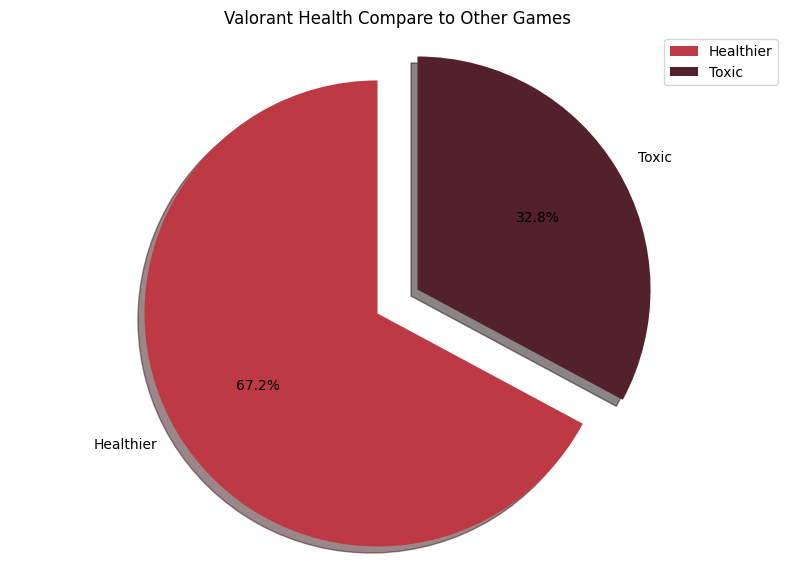

In [26]:
labels_part_game = "Healthier","Toxic"
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(10,7))

ax1.pie(is_valorant_healthy, explode=explode, labels=labels_part_game, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=["#BD3944","#53212C"])
        
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Valorant Health Compare to Other Games")
plt.legend()
plt.show()

### <b>Regular players vs. Non-Regular</b>

In [27]:
# regular vs. non_regular
regular_players = player_experience_dataset[player_experience_dataset["is_regular_player"] != "No"]
non_regular_players = player_experience_dataset[player_experience_dataset["is_regular_player"] != "Yes"]


def df_players(r_data, nr_data, index):
    df = pd.DataFrame({"regular":r_data, "non-regular":nr_data}, index=index)
    df = df.fillna(0)
    # df["regular"]=((df["regular"] - df["regular"].mean()) / df["regular"].std())
    # df["non-regular"]=((df["non-regular"] - df["non-regular"].mean()) / df["non-regular"].std()) 

    return df



### Often Servers Players Played At

In [28]:
server_regular = regular_players["most_played_server"].value_counts()
server_non_regular = non_regular_players["most_played_server"].value_counts()

most_played_by_players = df_players(server_regular, server_non_regular, servers)
most_played_by_players

,regular,non-regular
Hong Kong,284.0,41.0
Singapore,338.0,54.0
Tokyo,21.0,10.0
Mumbai,3.0,0.0
Sydney,0.0,1.0


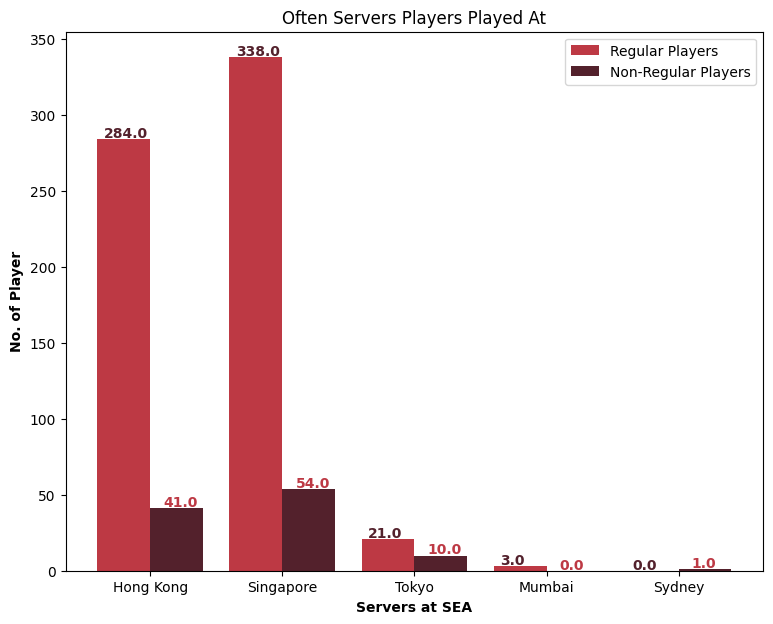

In [29]:


X_axis = np.arange(len(servers))
fig, ax = plt.subplots(figsize=(9,7))
plt.bar(X_axis-0.2, most_played_by_players["regular"], 0.4, label="Regular Players",color="#BD3944")
plt.bar(X_axis+0.2, most_played_by_players["non-regular"], 0.4, label="Non-Regular Players", color="#53212C")
for i, v in enumerate(most_played_by_players["regular"]):
    ax.text(i-0.35, v+1.1, str(v),
            color = '#53212C', fontweight = 'bold')
for i, v in enumerate(most_played_by_players["non-regular"]):
    ax.text(i+0.1, v+1.1, str(v),
            color = '#BD3944', fontweight = 'bold')
plt.xticks(X_axis, servers)
plt.xlabel("Servers at SEA",fontweight = 'bold')
plt.ylabel("No. of Player",fontweight = 'bold')
plt.title("Often Servers Players Played At")
plt.legend()
plt.show()

### Toxicity Activity

In [30]:
toxic_regular = regular_players["toxic_part_of_game"].value_counts().sort_index()
toxic_non_regular = non_regular_players["toxic_part_of_game"].value_counts().sort_index()

toxic_regular = toxic_regular.reindex(["Agent Select", "Early-game", "Mid-game","Late-game"])
toxic_non_regular = toxic_non_regular.reindex(["Agent Select", "Early-game", "Mid-game","Late-game"])
labels_part_game = toxic_regular.index

part_game_toxic_occurs = df_players(toxic_regular, toxic_non_regular, labels_part_game)

In [31]:
part_game_toxic_occurs["regular"] = part_game_toxic_occurs["regular"]/part_game_toxic_occurs["regular"].sum() 
part_game_toxic_occurs["non-regular"] = part_game_toxic_occurs["non-regular"]/part_game_toxic_occurs["non-regular"].sum()

part_game_toxic_occurs


,regular,non-regular
toxic_part_of_game,,
Agent Select,0.018576,0.000000
Early-game,0.195046,0.198113
Mid-game,0.696594,0.641509
Late-game,0.089783,0.160377


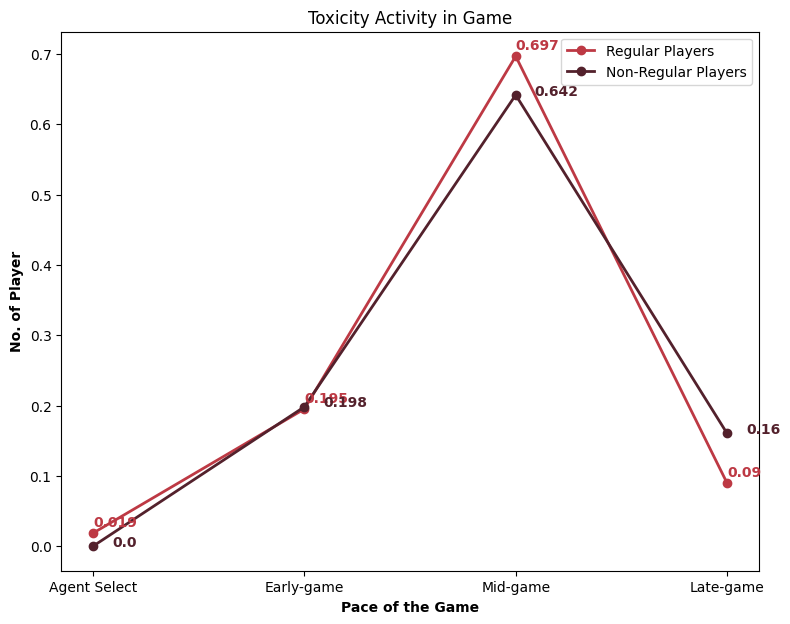

In [32]:
X_axis = np.arange(len(labels_part_game))
fig, ax = plt.subplots(figsize=(9,7))

plt.plot(X_axis, part_game_toxic_occurs["regular"], label="Regular Players",color="#BD3944", marker="o",linewidth=2)
plt.plot(X_axis, part_game_toxic_occurs["non-regular"], label="Non-Regular Players", color="#53212C",marker="o", linewidth=2)

for i, v in enumerate(part_game_toxic_occurs["regular"]):
    ax.text(i, v+0.01, str(round(v, 3)),
            color = "#BD3944", fontweight = 'bold')
for i, v in enumerate(part_game_toxic_occurs["non-regular"]):
    ax.text(i+0.09, v, str(round(v, 3)),
            color = "#53212C", fontweight = 'bold')

plt.xticks(X_axis, labels_part_game)
plt.xlabel("Pace of the Game",fontweight = 'bold')
plt.ylabel("No. of Player",fontweight = 'bold')
plt.title("Toxicity Activity in Game")
plt.legend()
plt.show()

### How Often Regular Players | Non-Regular Players Play a Week

In [33]:
often_regular = regular_players["often_a_week"].value_counts().sort_index()
often_non_regular = non_regular_players["often_a_week"].value_counts().sort_index()

df_often = df_players(often_regular, often_non_regular, often_regular.index)
df_often

,regular,non-regular
often_a_week,,
1-5 games,94,67
10-15 games,117,6
5-10 games,195,29
more than 15 games,240,4


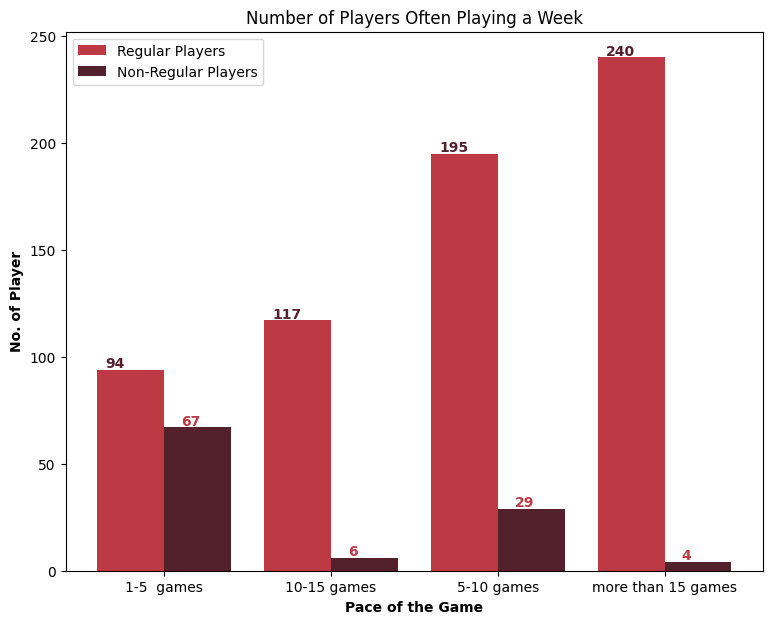

In [34]:
X_axis = np.arange(len(often_regular.index))
fig, ax = plt.subplots(figsize=(9,7))

plt.bar(X_axis-0.2, df_often["regular"], 0.4, label="Regular Players", color="#BD3944")
plt.bar(X_axis+0.2, df_often["non-regular"], 0.4, label="Non-Regular Players", color="#53212C")

for i, v in enumerate(df_often["regular"]):
    ax.text(i-0.35, v+1.1, str(v),
            color = '#53212C', fontweight = 'bold')
for i, v in enumerate(df_often["non-regular"]):
    ax.text(i+0.1, v+1.1, str(v),
            color = '#BD3944', fontweight = 'bold')
plt.xticks(X_axis, often_regular.index)
plt.xlabel("Pace of the Game", fontweight = 'bold')
plt.ylabel("No. of Player", fontweight = 'bold')
plt.title("Number of Players Often Playing a Week")
plt.legend()
plt.show()

### Most toxic server for players

In [35]:
most_toxic_regular = regular_players["most_toxic_server"].value_counts()
most_toxic_non_regular = non_regular_players["most_toxic_server"].value_counts()

server_toxic = df_players(most_toxic_regular, most_toxic_non_regular, servers)
server_toxic

,regular,non-regular
Hong Kong,486,72
Singapore,144,29
Tokyo,4,3
Mumbai,10,1
Sydney,2,1


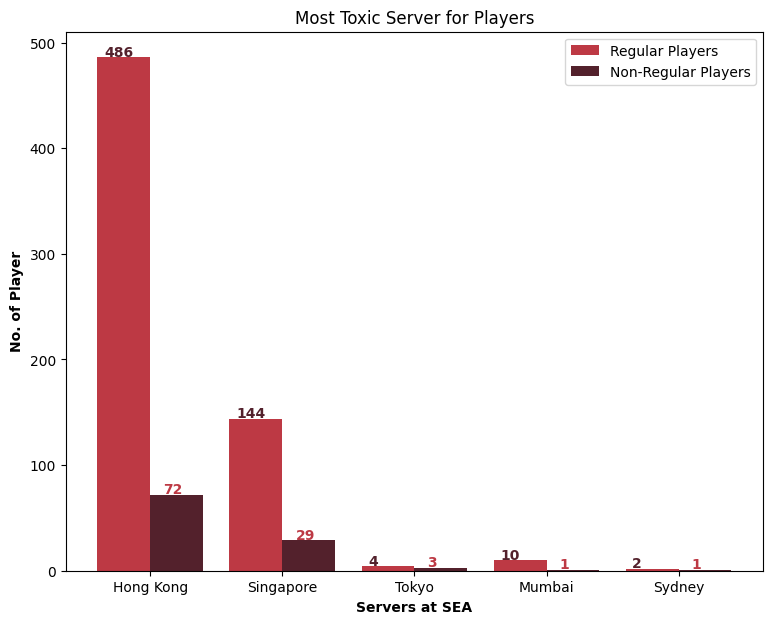

In [36]:
X_axis = np.arange(len(server_toxic.index))
fig, ax = plt.subplots(figsize=(9,7))

plt.bar(X_axis-0.2, server_toxic["regular"], 0.4, label="Regular Players", color="#BD3944")
plt.bar(X_axis+0.2, server_toxic["non-regular"], 0.4, label="Non-Regular Players", color="#53212C")
for i, v in enumerate(server_toxic["regular"]):
    ax.text(i-0.35, v+1.1, str(v),
            color = '#53212C', fontweight = 'bold')
for i, v in enumerate(server_toxic["non-regular"]):
    ax.text(i+0.1, v+1.1, str(v),
            color = '#BD3944', fontweight = 'bold')
plt.xticks(X_axis, server_toxic.index)
plt.xlabel("Servers at SEA", fontweight = 'bold')
plt.ylabel("No. of Player",fontweight = 'bold')
plt.title("Most Toxic Server for Players")
plt.legend()
plt.show()

### <b>Player Chats Dataset</b>

In [37]:
# labeled_dataset
labeled_dataset.tail()

,player,message,label,type,cl_message
8111,Calmpath #9409,nc,positive,voice,[nc]
8112,Calmpath #9409,nt,positive,voice,[nt]
8113,DN NEMO#PEKOO,nice shot,positive,voice,"[nice, shot]"
8114,DN NEMO#PEKOO,basically anything when vibing,positive,voice,"[basically, anything, vibing]"
8115,DN NEMO#PEKOO,sarap mo,positive,voice,"[sarap, mo]"


In [38]:
text_c = labeled_dataset[labeled_dataset["type"] == "text"]
voice_c = labeled_dataset[labeled_dataset["type"] == "voice"]
text_c_val = text_c["label"].value_counts()
voice_c_val = voice_c["label"].value_counts()
text_c

,player,message,label,type,cl_message
0,Crescht #blom,nt,positive,text,[nt]
1,Crescht #blom,bobo,negative,text,[bobo]
2,Crescht #blom,quit ka nalang,negative,text,"[quit, nalang]"
3,Berith#TWICE,bobo,negative,text,[bobo]
4,Berith#TWICE,goblok,negative,text,[goblok]
...,...,...,...,...,...
2850,DN NEMO#PEKOO,bobo,negative,text,[bobo]
2851,DN NEMO#PEKOO,tanga,negative,text,[tanga]
2852,DN NEMO#PEKOO,babae,neutral,text,[babae]
2853,DN NEMO#PEKOO,racist slurs,negative,text,"[racist, slur]"


In [39]:
def to_string(x):
    if len(x) == 1:
        return x[0]
    elif len(x) == 0:
        return ""
    else:
        return " ".join(x)
labeled_dataset["cl_message_un"] = labeled_dataset["cl_message"].apply(lambda x: to_string(x))


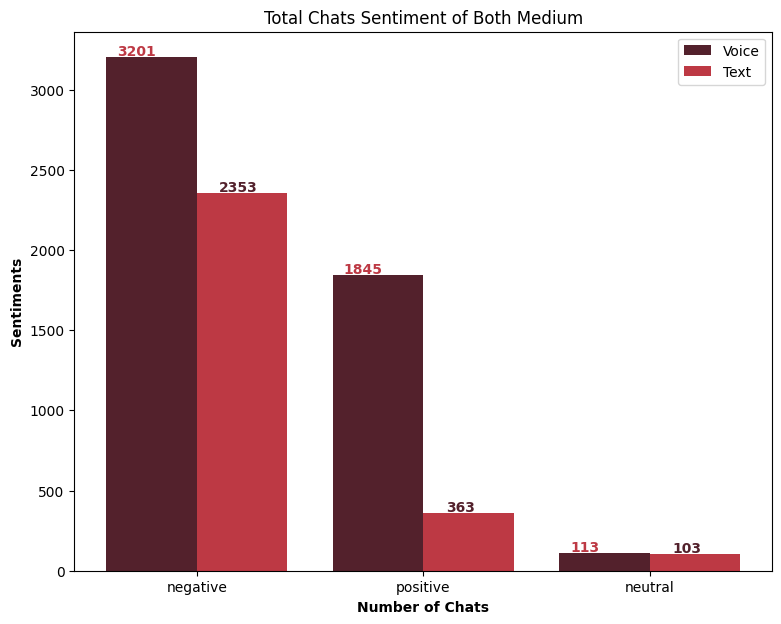

In [40]:
X_axis = np.arange(len(text_c_val.index))

fig, ax = plt.subplots(figsize=(9,7))

plt.bar(X_axis-0.2, voice_c_val,0.4,label="Voice",color="#53212C")
plt.bar(X_axis+0.2, text_c_val,0.4,label="Text",  color="#BD3944")

for i, v in enumerate(voice_c_val):
    ax.text(i-0.35, v+10, str(v),
            color = '#BD3944', fontweight = 'bold')
for i, v in enumerate(text_c_val):
    ax.text(i+0.1, v+10, str(v),
            color = '#53212C', fontweight = 'bold')


plt.xticks(X_axis, text_c_val.index)
plt.xlabel("Number of Chats", fontweight = 'bold')
plt.ylabel("Sentiments",fontweight = 'bold')
plt.title("Total Chats Sentiment of Both Medium")
plt.legend()
plt.show()

### Word Cloud

In [41]:
from wordcloud import  WordCloud

ModuleNotFoundError: No module named 'wordcloud'

Word Cloud in From Text Chat

<b>Positive words</b>

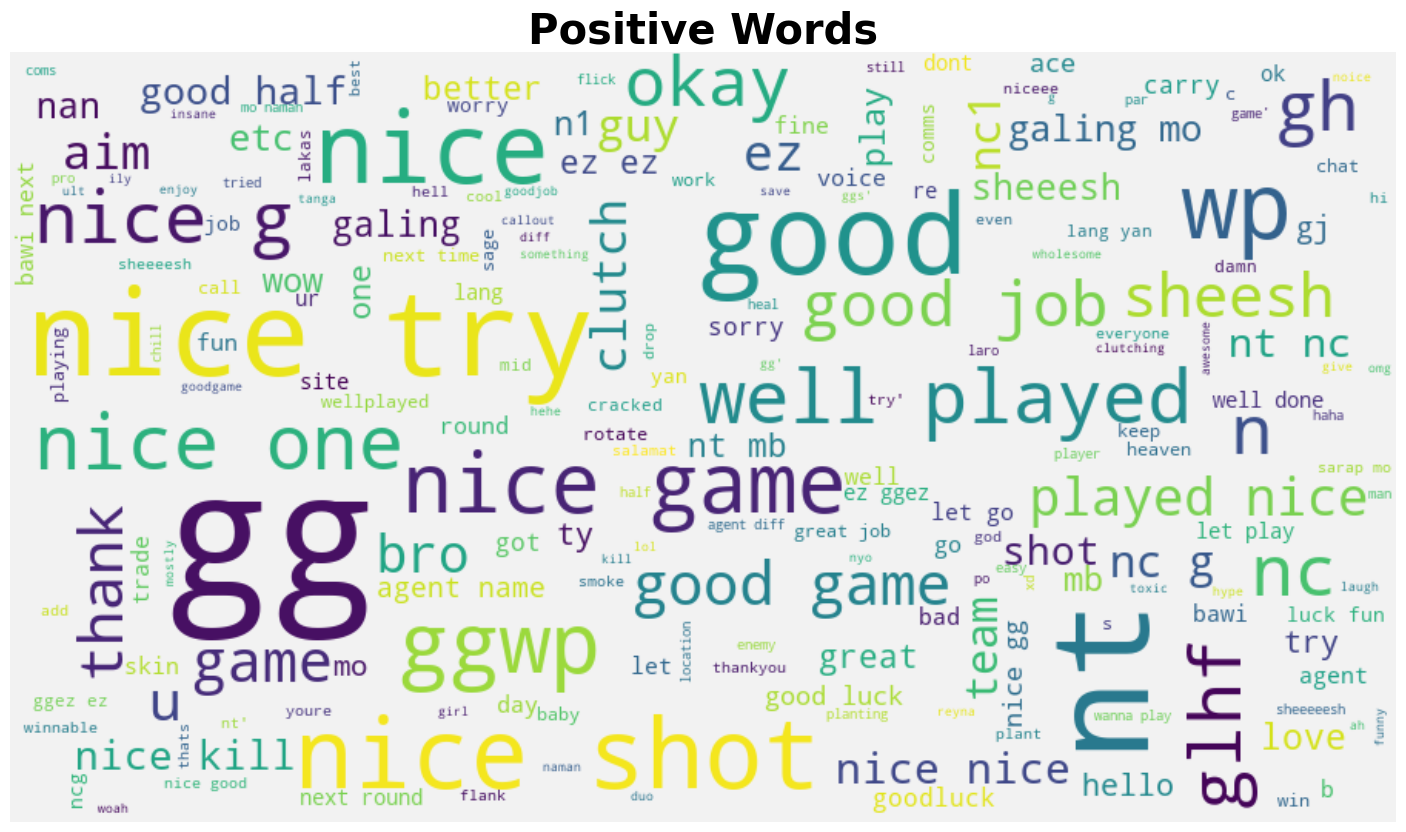

In [ ]:
all_words = ' '.join([word for word in labeled_dataset['cl_message_un'][labeled_dataset['label'] == "positive"] if word != ""])
wc = WordCloud(width=900, height=500, random_state=0, max_font_size=115,background_color="#f2f2f2").generate(all_words)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Positive Words', fontsize=30, fontweight="bold")
plt.axis('off')
plt.show()

<b>Negative words</b>

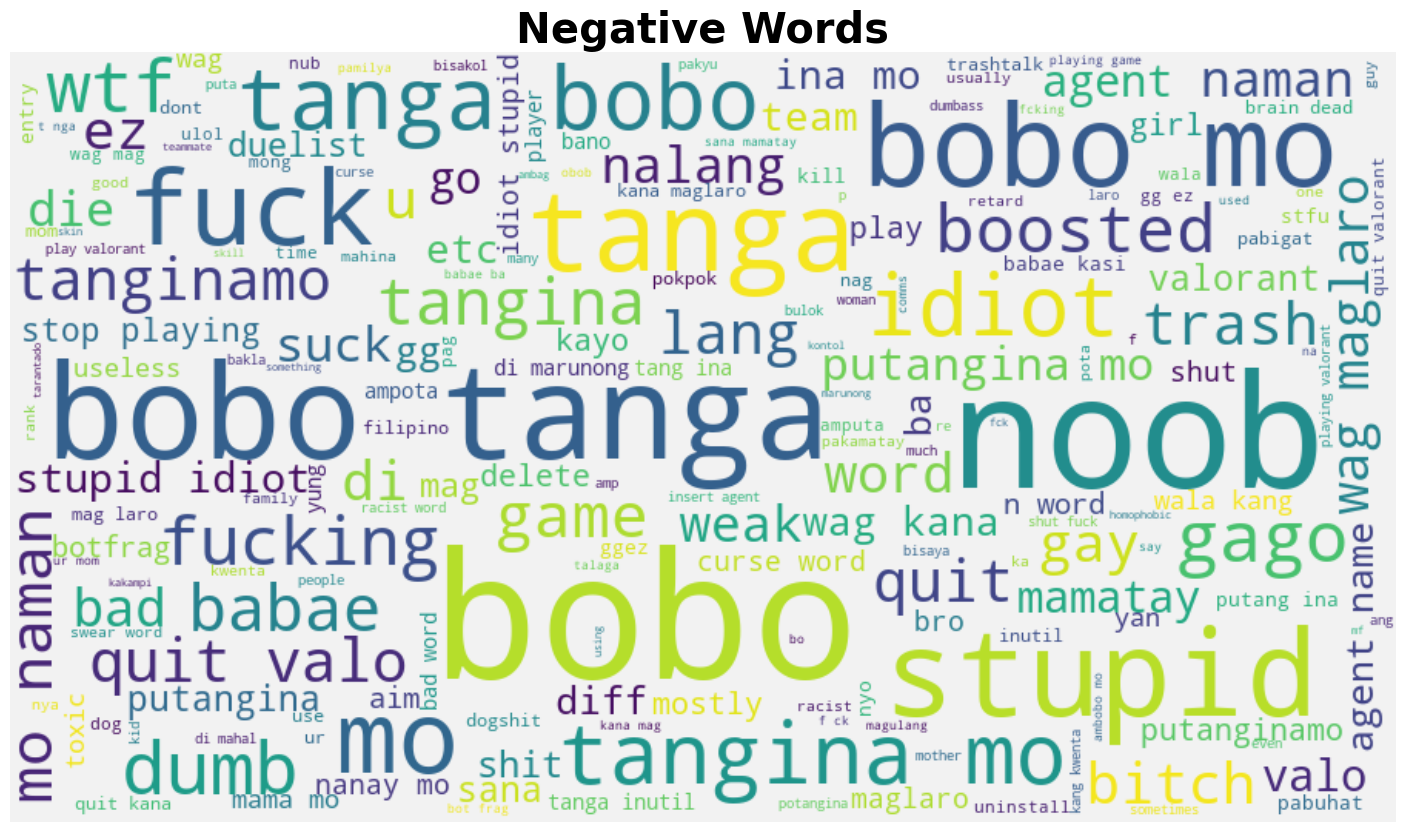

In [ ]:
all_words = ' '.join([word for word in labeled_dataset['cl_message_un'][labeled_dataset['label'] == "negative"] if word != ""])
wc = WordCloud(width=900, height=500, random_state=0, max_font_size=115,background_color="#f2f2f2").generate(all_words)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Negative Words', fontsize=30, fontweight="bold")
plt.axis('off')
plt.show()

<b>Neutral words</b>

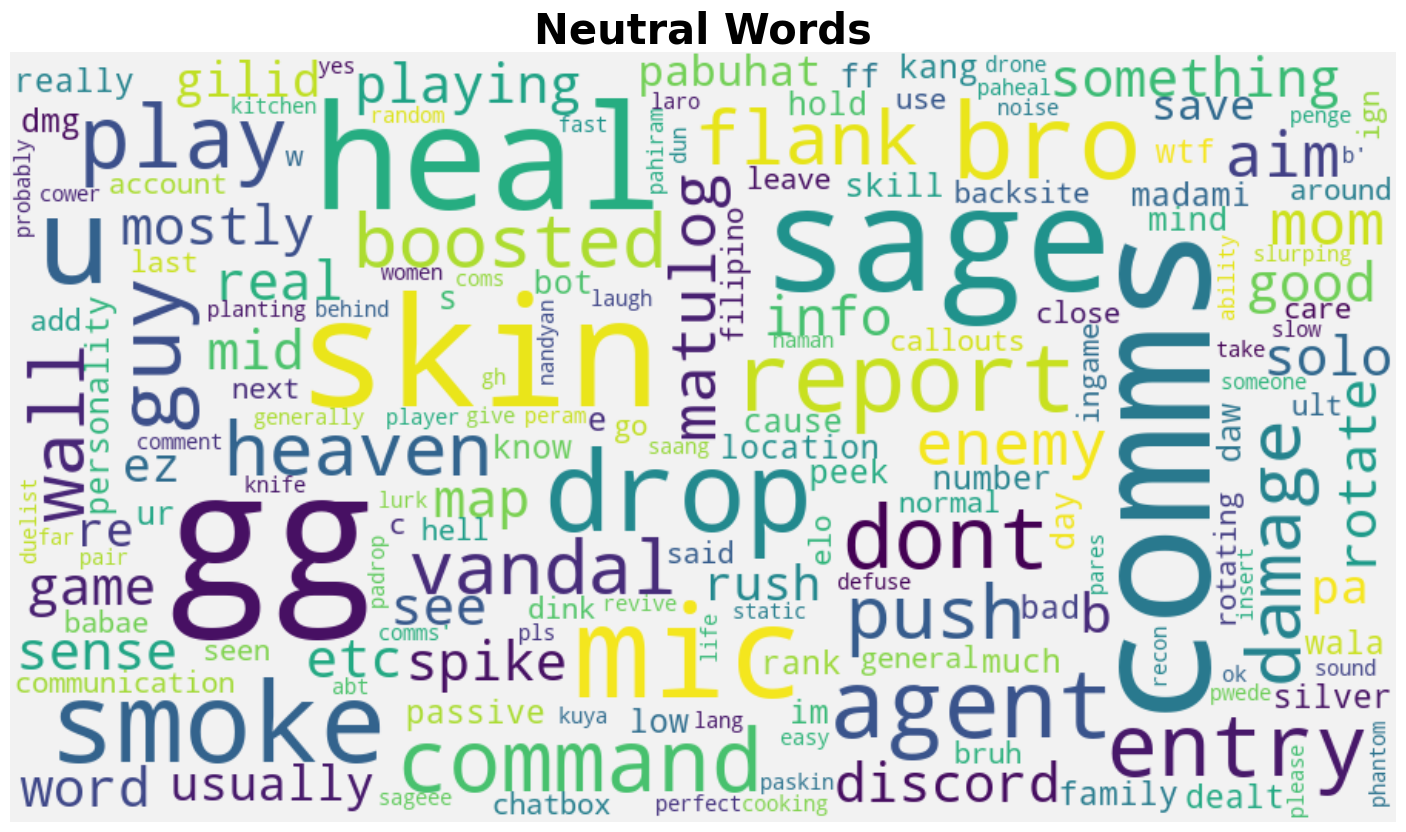

In [ ]:
all_words = ' '.join([word for word in labeled_dataset['cl_message_un'][labeled_dataset['label'] == "neutral"] if word != ""])
wc = WordCloud(width=900, height=500, random_state=0, max_font_size=115,background_color="#f2f2f2").generate(all_words)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Neutral Words', fontsize=30, fontweight="bold")
plt.axis('off')
plt.show()

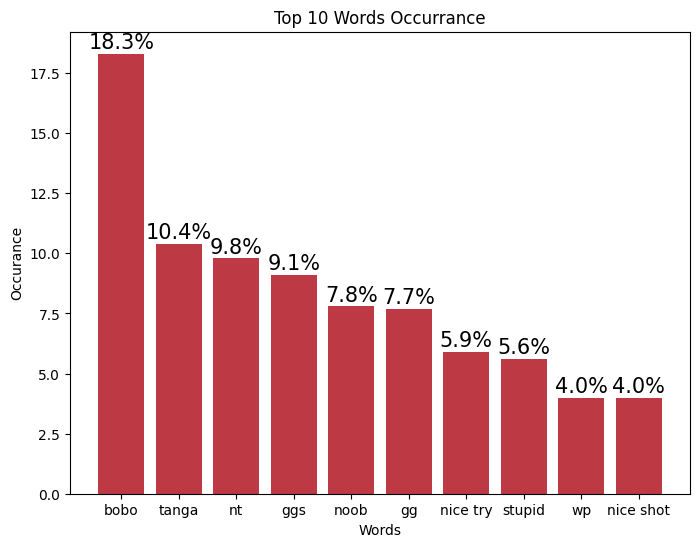

In [42]:
vouny= labeled_dataset["cl_message_un"].value_counts()
vouny = round((vouny/len(vouny))*100, 1)
fig, ax = plt.subplots(figsize=(8,6))
e= ax.bar(vouny.index[:10], vouny.values[:10],color='#BD3944')

for rect1 in e:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.xlabel("Words")
plt.ylabel("Occurance")
plt.title("Top 10 Words Occurrance")
plt.show()

## Preparing Dataset for Training

Using Keras library to do training and vectorization. First Preparing the data, label will transmute to digit, positive -> 1, negative -> -1, neutral -> 0.

In [43]:
labeled_dataset["label"] = labeled_dataset["label"].apply(lambda x: 1 if x == "positive" else -1 if x == "negative" else 0)

In [44]:
labeled_dataset = labeled_dataset.sample(frac = 1)
labeled_dataset.reset_index(inplace=True, drop=True)
labeled_dataset.head(20)

,player,message,label,type,cl_message,cl_message_un
0,暗Cloudcry ツ #4909,Nice G,1,voice,"[nice, g]",nice g
1,Isumi Tachiii #mpty,nt,1,text,[nt],nt
2,MartinDeCello #LCN79,next time be better,1,voice,"[next, time, better]",next time better
3,xNightfallx,WP,1,voice,[wp],wp
4,his toyo #womp,bulag ka ba,-1,text,"[bulag, ba]",bulag ba
5,zdraugnaV #Ja9,bobo,-1,text,[bobo],bobo
6,Kazu#12345,tanga,-1,text,[tanga],tanga
7,Fleur Du Soleil #Asura,anjing goblok,-1,voice,"[anjing, goblok]",anjing goblok
8,Zaelleeeeeee#0143,very good,1,voice,[good],good
9,eris #gebb,nice half,1,voice,"[nice, half]",nice half


### Creates Tokenizer

In [45]:
from keras_preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

### <b>Bag of Words</b>

Using Count Vectorizer

In [46]:
tknz = Tokenizer()
tknz.fit_on_texts(labeled_dataset["cl_message_un"])
vectored_count = tknz.texts_to_matrix(labeled_dataset["cl_message_un"], mode='count')
vectored_count

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Using TF-IDF Vectorizer

In [47]:
tknz = Tokenizer()
tknz.fit_on_texts(labeled_dataset["cl_message_un"])
vectored_tf = tknz.texts_to_matrix(labeled_dataset["cl_message_un"], mode="tfidf")
vectored_tf

array([[0.        , 2.43018987, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<b>Splitting the dataset</b>
We splitted the data set 70% for both testing and training set, but the source would be reciprocal from each other.

In [48]:
y=labeled_dataset["label"].values
x_train, x_test, y_train,y_test = train_test_split(vectored_count,y,test_size=0.3)
print(len(x_train), 'train sequences')
print(len(x_test), 'train sequences')

5584 train sequences
2394 train sequences


In [49]:
print('x_train shape:', x_train.shape) 
print('x_test shape:', x_test.shape)

x_train shape: (5584, 2042)
x_test shape: (2394, 2042)


## Using Multinomial Linear Regression

In [50]:
from sklearn.linear_model import LogisticRegression

### Training of Dataset

In [102]:
lregressor = LogisticRegression(random_state=20, multi_class='multinomial',solver="newton-cg",n_jobs=10, fit_intercept=True, max_iter=1000)
lregressor.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=10,
                   random_state=20, solver='newton-cg')

In [103]:
y_lpred = lregressor.predict(x_test)
df = pd.DataFrame({"Predicted": y_lpred,"Actual":y_test})
df

,Predicted,Actual
0,-1,-1
1,-1,-1
2,1,1
3,-1,-1
4,-1,-1
...,...,...
2389,-1,-1
2390,-1,-1
2391,1,1
2392,-1,-1


In [104]:
params = lregressor.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'multinomial', 'n_jobs': 10, 'penalty': 'l2', 'random_state': 20, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [105]:
coef = lregressor.coef_
intercept = lregressor.intercept_
print('Intercept: \n', intercept)
print('Coefficients: \n', coef)

Intercept: 
 [ 0.91235361 -1.49598369  0.58363008]
Coefficients: 
 [[ 0.         -1.60822378  2.9399684  ...  0.31608571  0.23166573
   0.128497  ]
 [ 0.         -1.07179924 -0.83068319 ... -0.0429674  -0.06896616
  -0.0244366 ]
 [ 0.          2.68002303 -2.10928521 ... -0.27311831 -0.16269957
  -0.1040604 ]]


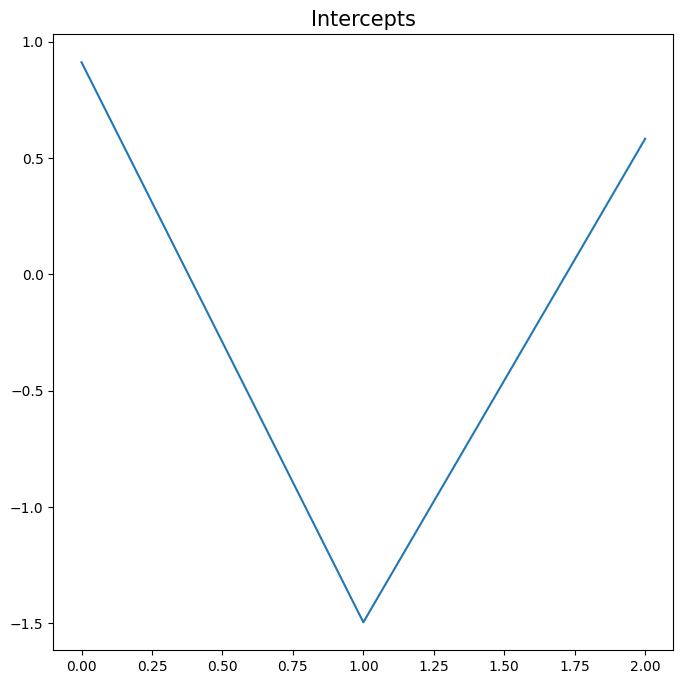

In [106]:
plt.figure(figsize=(8,8))
plt.plot(intercept)
# plt.move_legend()
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accur
# acy Score: {0}'.format(ascore)
plt.title("Intercepts", size = 15);
plt.show()

Using Metric to Measure Accuracy

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_recall_fscore_support

In [107]:
cm = confusion_matrix(y_test, y_lpred)
print(cm)
ascore = accuracy_score(y_test, y_lpred)
print("\nAccuracy Score of Model Using Multinomial")
print("The Accuracy Score is "+str(ascore))

[[1249    5   37]
 [  28   10   22]
 [  82    6  955]]

Accuracy Score of Model Using Multinomial
The Accuracy Score is 0.924812030075188


In [108]:
class_report_ml=classification_report(y_test, y_lpred,target_names=["negative (-1)","neutral (0)", "positive (1)"], output_dict=True)
class_rep_df_ml = pd.DataFrame(class_report_ml)
class_rep_df_ml

,negative (-1),neutral (0),positive (1),accuracy,macro avg,weighted avg
precision,0.919058,0.476190,0.941815,0.924812,0.779021,0.917873
recall,0.967467,0.166667,0.915628,0.924812,0.683254,0.924812
f1-score,0.942642,0.246914,0.928537,0.924812,0.706031,0.919060
support,1291.000000,60.000000,1043.000000,0.924812,2394.000000,2394.000000


Text(0.5, 1.0, 'Accuracy Score: 0.924812030075188')

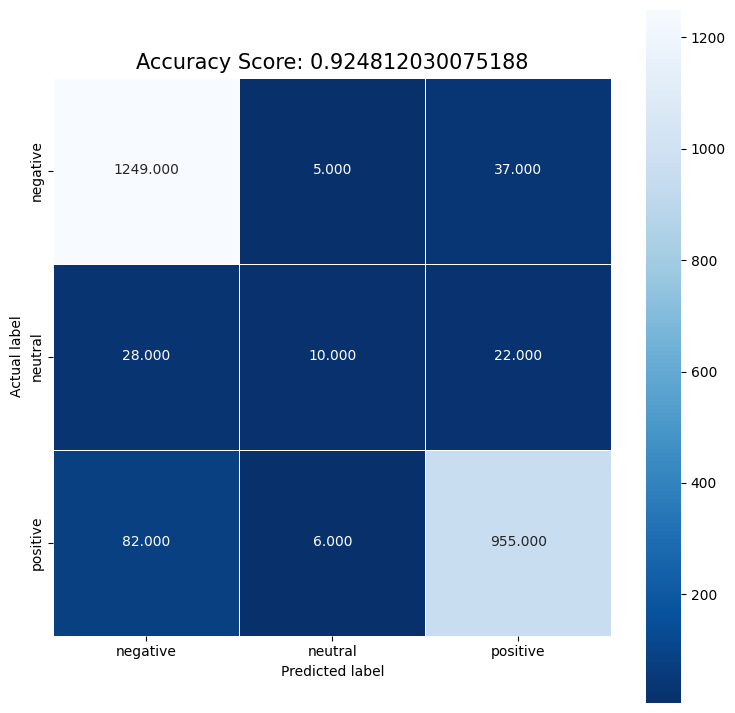

In [109]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',
xticklabels=["negative","neutral","positive"],yticklabels=["negative","neutral","positive"])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(ascore)
plt.title(all_sample_title, size = 15)

--------------------

## Using Random Forest Algorithm

In [60]:
from sklearn.ensemble import RandomForestClassifier

<b>Training of Dataset</b>

In [61]:
rfc = RandomForestClassifier(max_depth=30, random_state=0, min_samples_split=3, min_samples_leaf=3,max_features="sqrt",n_estimators=2043,)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=2043, random_state=0)

<b>Test the Trained Dataset</b>

In [62]:
y_rpred = rfc.predict(x_test)
df = pd.DataFrame({"Predicted":y_rpred,"Actual":y_test})
df

,Predicted,Actual
0,-1,-1
1,-1,-1
2,1,1
3,-1,-1
4,-1,-1
...,...,...
2389,-1,-1
2390,-1,-1
2391,1,1
2392,-1,-1


<b>Reports & Accuracy check</b>

In [63]:
cm = confusion_matrix(y_test, y_rpred)
print(cm)
ascore = accuracy_score(y_test, y_rpred)
print("\nAccuracy Score of Model Using Random Forest Algorithm")
print("The Accuracy Score is "+str(ascore))

[[1273    0   18]
 [  56    0    4]
 [ 253    0  790]]

Accuracy Score of Model Using Random Forest Algorithm
The Accuracy Score is 0.8617376775271512


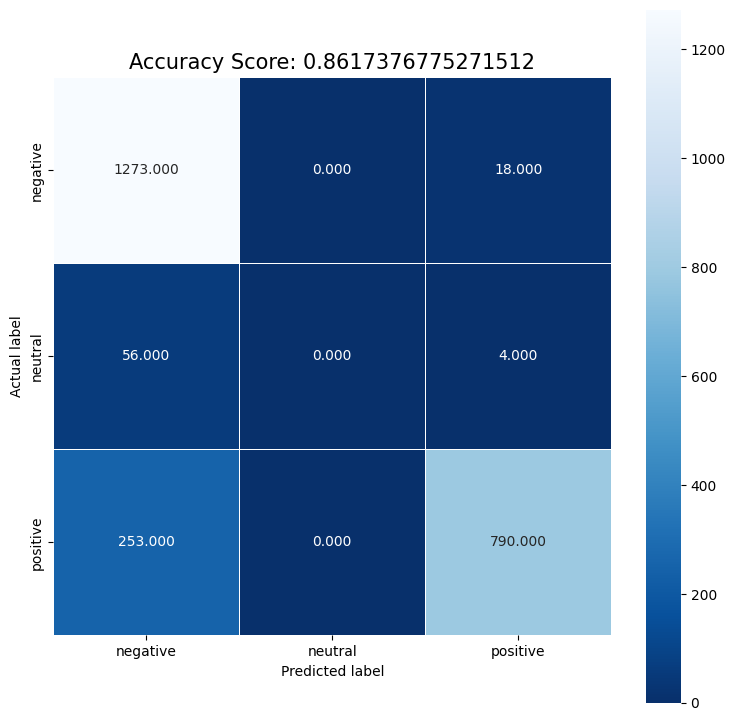

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',
xticklabels=["negative","neutral","positive"],yticklabels=["negative","neutral","positive"]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ascore)
plt.title(all_sample_title, size = 15);

In [65]:
class_report_rf=classification_report(y_test, y_rpred,target_names=["negative (-1)","neutral (0)", "positive (1)"], output_dict=True, zero_division=0)
class_rep_df_rf = pd.DataFrame(class_report_rf)
class_rep_df_rf

,negative (-1),neutral (0),positive (1),accuracy,macro avg,weighted avg
precision,0.804678,0.0,0.972906,0.861738,0.592528,0.857803
recall,0.986057,0.0,0.757430,0.861738,0.581163,0.861738
f1-score,0.886182,0.0,0.851752,0.861738,0.579311,0.848972
support,1291.000000,60.0,1043.000000,0.861738,2394.000000,2394.000000


------------------

# Visualized the Data Gathered From Trained Model

In [66]:
def accuracy_graph(title, column):
    ml_val_=class_rep_df_ml.drop("support")
    rf_val_=class_rep_df_rf.drop("support")
    accu_rf =rf_val_[column]*100
    accu_ml =ml_val_[column]*100


    fig, ax = plt.subplots(figsize=(6,6))

    ax.plot(accu_ml,label="Multinomial Logistic Regression", marker="o")
    ax.plot(accu_rf,label="Random Forest Regression", marker="o")
    plt.title(title)
    plt.legend()
    plt.show()


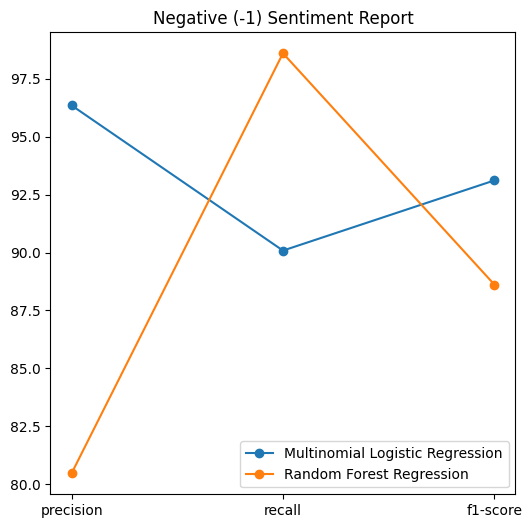

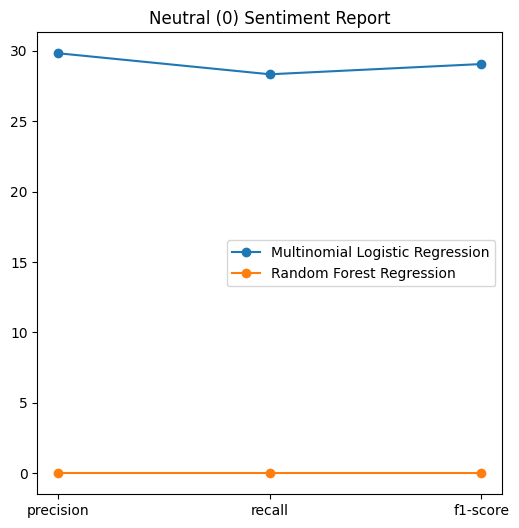

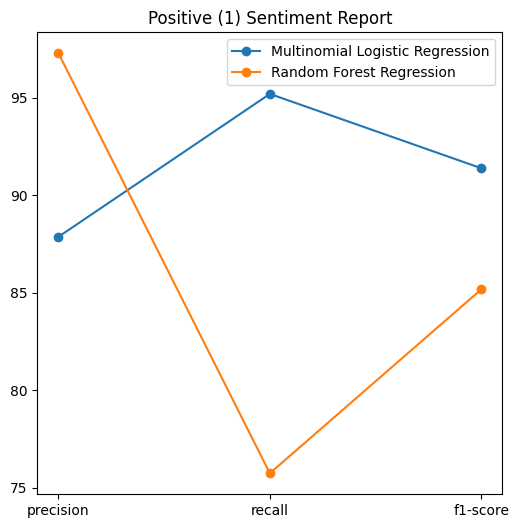

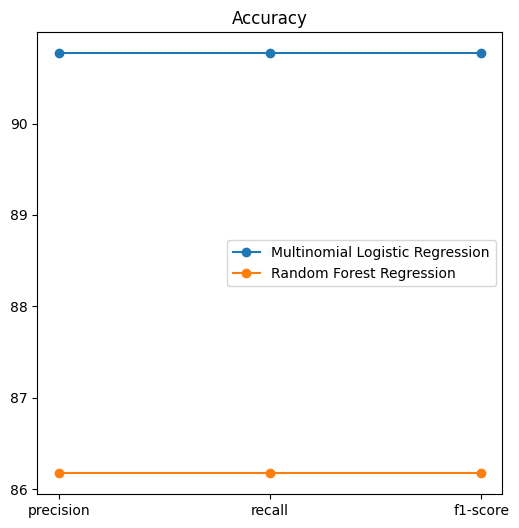

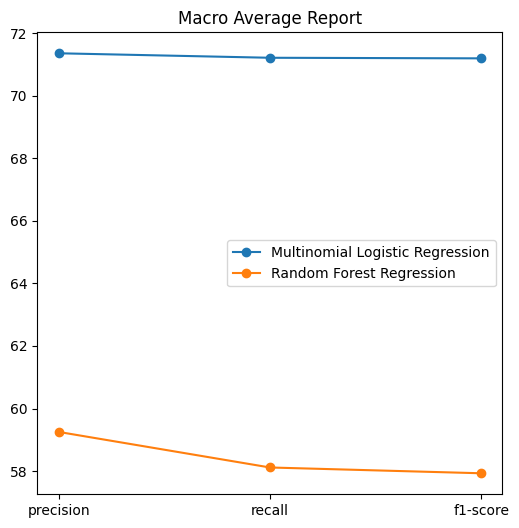

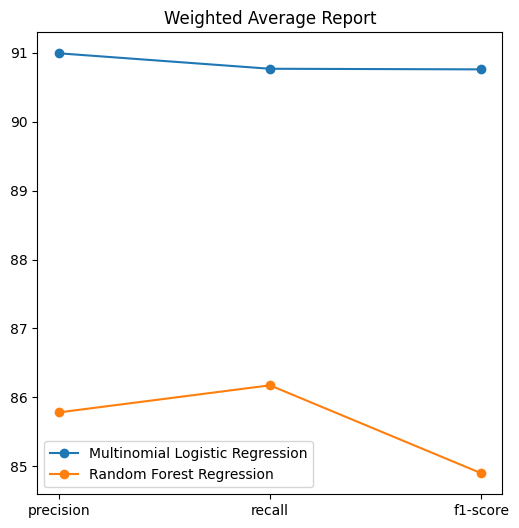

In [67]:
titles = [
    "Negative (-1) Sentiment Report",
    "Neutral (0) Sentiment Report",
    "Positive (1) Sentiment Report",
    "Accuracy",
    "Macro Average Report", 
    "Weighted Average Report",
]
for i,v in enumerate(class_rep_df_rf.columns):
    accuracy_graph(titles[i], v)